
# Límite e continuidade das funcións escalares e vectoriais


In [1]:
import time
print(' Última execución  ', time.asctime() )

 Última execución   Sat Mar 15 23:56:00 2025



### Obxectivos

 Lembrar os conceptos de límite e continuidade en funcións dunha soa dimensión.

 E estendelos a funcións escalares e vectoriais.

 Presentar un exemplo de como estimar os posibles límites dunha función escalar.


In [2]:
# general imports
%matplotlib inline

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')


### Límite de funcións escalares e vectoriais

####  Bola

 Antes de estudar os límites debemos definir un novo concepto: **bola** .

 Nunha dimensión, a distancia entre dous valores reais, $x$ e $x_0$, estaba dada polo valor absoluto: $|x - x_0|$.



Nun espazo real n-dimensional, $\mathbb{R}^n$, $n >1$, a distancia euclidiana entre dous puntos, ${\bf x}$ e ${\bf x}_0$ é a norma do vector ${\bf x}- {\bf x}_0$:

$$
|| {\bf x} - {\bf x}_0 || = \sqrt{\sum_{i=1}^{n}(x_i - x_{0i})^2}
$$

 Por exemplo, en dúas dimensións, a distancia entre dous puntos: $(x, y)$ e $(x_0, y_0)$ é:

 $$
 \sqrt{(x-x_0)^2 + (y- y_0)^2}
 $$

 A distancia entre dous puntos é unha función escalar.



Se temos un espazo real de dimensión $n$, $\mathbb{R}^n$, con $n>1$. Chamamos **bola** aberta de radio $r$ centrada nun punto ${\bf x}_0 $ a todos os puntos dese espazo, ${\bf x}$, que están a unha distancia de ${\bf x}_0$ menor de $r$.

$$
\{ \forall {\bf x} \in \mathbb{R}^n \, |  \; ||{\bf x} - {\bf x}_0|| \lt r \}
$$

 Se a bóla está pechada, a condición é que estean a unha distancia menor ou igual a ela, $\le$, na expresión anterior.

 Podes imaxinar que en dúas dimensións, unha bola é un disco. Se está pechado, inclúe os puntos da circunferencia do seu borde; se está aberto, non o inclúe.

 *Pregunta:* que forma xeométrica ten unha bola en tres dimensións? e en $n$-dimensións?



Algunhas definicións máis:

 Dicimos que un punto é *interior* dun conxunto $S$, se podemos centrar nel unha bola cuxos puntos pertenzan todos ao conxunto. E *borde* , se todas as bólas que centramos nela, sempre teñen puntos do conxunto e puntos que non.

 **Pregunta** : Considera unha bola pechada nun espazo 2D. Son os puntos da circunferencia que limita o interior ou o bordo do disco?

 **Exercicio** : Podes demostrar que todos os puntos dunha bola aberta no espazo 2D son interiores? Mira a seguinte cela.


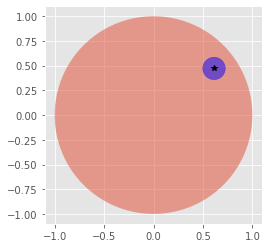

In [3]:
import random
phis     = np.linspace(0., 2*np.pi, 100)
## big circle
xs, ys   = np.cos(phis), np.sin(phis)
r1, phi  = np.random.uniform(0., 1.), np.random.uniform(0., 2*np.pi)
while (r1 >=1.): r1, phi  = np.random.uniform(0., 1.), np.random.uniform(0., 2*np.pi)
## radius of small circle
## 1-r1 is the distance between the center of the new circle and the border...
r2       = (1. - r1)/2.
## centre of small circle
x1, y1   = r1*np.cos(phi), r1*np.sin(phi)
## small circle
x1s, y1s = x1 + r2 * np.cos(phis), y1 + r2 * np.sin(phis)
fig = plt.figure(); ax = plt.gca()
ax.fill(xs, ys, alpha = 0.5)
ax.plot(x1, y1, '*', color='black')
ax.fill(x1s, y1s, color='blue', alpha = 0.5)
ax.set_aspect('equal');


### Límites

 Revisemos a definición dun límite nunha dimensión.

 Para unha función $f(x)$ dixemos que o límite existía nun punto $x_{0}$ do dominio ou da súa fronteira, se cando nos achegamos a ela, a función "aproximábase a un valor $b$" .

 Matemáticamente, poñemos unha condición.

 Dicíamos que $b$ era o límite de $f(x)$ en $x_0$, se sempre podíamos atopar un intervalo de tamaño $\delta$ arredor de $x_0$, tal que o valor da función nos puntos dese intervalo, estaba tan próximo ao valor $b$ como quixésemos, dado por unha distancia $\epsilon$.



É máis doado dalo en notación matemática:

 Existe o límite dunha función $f(x)$ en $x_0$ e vale $b$, se:

$$
\forall \epsilon >0, \; \exists \, \delta >0, \; \mathrm{t.q.} \;| x- x_0| < \delta \, \Rightarrow \, | f(x) - b| < \epsilon
$$



A seguinte gráfica corresponde á función:

 $$
 f(x) = \frac{\sin x}{x}
 $$

 Vemos que a función ten un límite na orixe, $x=0$.

 Podes calculalo se aplicas a regra de l'Hôpital ou fas a expansión de Taylor do numerador e do denominador ao redor de $x=0$


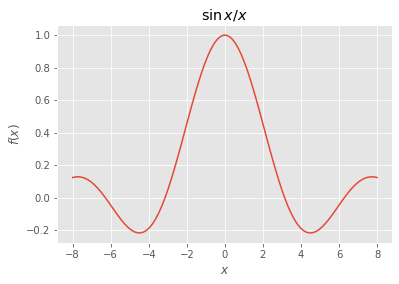

In [4]:
xs = np.linspace(-8., 8., 100)
ys = np.sin(xs) / xs
plt.plot(xs, ys);
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); plt.title('$\sin x /x$');


Dicimos que unha función escalar $f({\bf x}$) ten un límite nun punto, ${\bf x}_0$, do seu dominio ou do seu bordo e vale $b$, se:

$$
\forall \epsilon >0, \; \exists \, \delta >0, \; \mathrm{t.q.} \; \| {\bf x}- {\bf x}_0 \| < \delta \, \Rightarrow \, | f({\bf x}) - b | < \epsilon
$$

 O valor da función, $f({\bf x})$, nos puntos, ${\bf x}$ dunha bola de tamaño $\delta$ e centrada en ${\bf x}_0$ están dentro dun intervalo de tamaño $\epsilon$ centrado en $b$.



E do mesmo xeito para unha función vectorial.

 Dicimos que unha función vectorial ${\bf f}({\bf x}$) ten un límite nun punto, ${\bf x}_0$, do seu dominio ou bordo do mesmo e vale ${\bf b }$, se:

$$
\forall \epsilon >0, \; \exists \, \delta >0, \; \mathrm{t.q.} \; \| {\bf x}- {\bf x}_0 \| < \delta \, \Rightarrow \, \| {\bf f}({\bf x}) - {\bf b} \| < \epsilon
$$

 O valor da función, ${\bf f}({\bf x})$, nos puntos ${\bf x}$ dunha bola de tamaño $\delta$ e centrada en ${\bf x} _0$ están dentro dunha bola de radio $\epsilon$ centrada en ${\bf b}$.



Observa agora a gráfica da función escalar:

 $$
 f(x, y) = \frac{\sin \sqrt{x^2 + y^2}}{ \sqrt{x^2 + y^2}}
 $$

 Ves que volve ter un límite na orixe e que vale 1.

 Calculalo, porén, é máis complicado. Debemos recorrer á definición de límite.

 Dado un tamaño $\epsilon$, debemos atopar un disco de raio $\delta$ centrado na orixe, de xeito que para os puntos do disco, o valor da función estea a unha distancia inferior a $\epsilon$ do límite, de 1 neste caso.


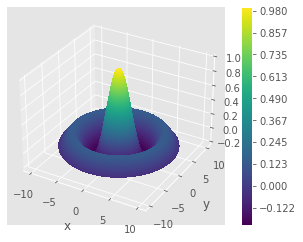

In [5]:
%matplotlib inline
rs       = np.linspace(1e-10, 10., 1000)
ps       = np.linspace(0. , 2.*np.pi, 1000)
rms, pms = np.meshgrid(rs, ps)
xms      = rms * np.cos(pms)
yms      = rms * np.sin(pms)
zms      = np.sin(rms)/rms
fig = plt.figure(); ax = plt.axes(projection='3d');
#sf = ax.plot_surface(xms, yms, zms, cmap='jet', alpha = 1.);
#ax.set_xlabel('x'); ax.set_ylabel('y'); fig.colorbar(sf);
N = 500
CS3 = ax.contourf(xms, yms, zms, N, cmap="viridis")
ax.set_xlabel('x');ax.set_ylabel('y')
fig.colorbar(CS3, ax=ax)


A seguinte cela permíteche variar o valor de $\epsilon$ e móstrache a gráfica cos puntos que están preto do límite a unha distancia inferior a $\epsilon$.

 A súa proxección no plano $(x, y)$ móstrache a bola, o disco, de raio $\delta$, con respecto á orixe na que están incluídos todos os puntos. Non importa o valor de $\epsilon$ que elixas, sempre atoparás un disco de raio $\delta$. Logo existe o límite e é igual a 1.

 **Explora**: cambia o valor de $\epsilon$ e observa como cambia o tamaño do disco $\delta$ que cumpre a condición de límite.


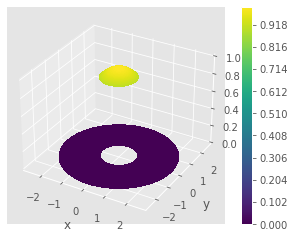

In [6]:
rs1       = np.linspace(1e-10, 2.5, 2000)
ps1       = np.linspace(0. , 2.*np.pi, 2000)
rms1, pms1 = np.meshgrid(rs1, ps1)
xms1      = rms1 * np.cos(pms1)
yms1      = rms1 * np.sin(pms1)
zms1      = np.sin(rms1)/rms1
b,epsilon = 1,0.1
sel        = abs(zms1-b) < epsilon
zms1[~sel]  = 0.
fig = plt.figure(); ax = plt.axes(projection='3d');
#sf = ax.plot_surface(xms, yms, zms, cmap='jet', alpha = 1.);
#ax.set_xlabel('x'); ax.set_ylabel('y'); fig.colorbar(sf);

N = 500
CS3 = ax.contourf(xms1, yms1, zms1, N, cmap="viridis")
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(CS3, ax=ax)


Para calcular os límites usaremos unha aproximación.

 Calcularemos os límites nun punto aproximándoo por todas as rectas posibles.

 Se o valor do límite que atopamos é o mesmo e non depende da liña, podemos afirmar: **"se o límite existe, este debe ser o seu valor".**



**Exemplo** : Calcula o límite na orixe da función escalar:

$$
f(x, y) = \frac{\sin\sqrt{x^2 + y^2}}{\sqrt{x^2 + y^2}}
$$

 As seguintes celas mostran os conxuntos de nivel da función e unha liña que pasa pola orixe.

 **Explorar** cambia a pendente da recta e considera o valor que acada a función cando se achega á orixe ao longo desa liña.


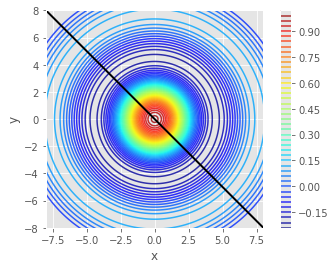

In [7]:
a = -1. #pendente da recta que pasa pola orixe
xs = np.linspace(-8., 8., 20)
ys = a*xs
fig = plt.figure(); ax = fig.gca()
sf = ax.contour(xms, yms, zms, 40, cmap = 'jet', alpha = 0.8); ax.set_aspect('equal')
ax.plot(xs, ys, color='black', lw=2)
ax.set_xlim(-8., 8.); ax.set_ylim(-8., 8.); fig.colorbar(sf)
ax.set_xlabel('x'); ax.set_ylabel('y');


Agora calculamos o límite na orixe aproximando todas as liñas que pasan pola orixe, que podemos dar como:
-  Cartesianas:

 $$
 y = ax + b
 $$

 onde b = 0, porque pasa pola orixe.
 Calculamos en 1D o límite cando $x \rightarrow 0$
 
 
-  ou en polares:

 $$
 x = r \cos \phi; \; y = r \sin \phi
 $$

 onde $\phi \in [0, 2 \pi)$. Tomamos o límite en 1D cando $r \rightarrow 0$



*Solución* :

 En cartesianas, substituíndo $y = ax$:

 $$
 \lim_{x \to 0 }\frac{\sin x \sqrt{(1 +a^2)}}{ x \sqrt{1 + a^2}} = 1
 $$

 Se existe o límite é 1

 ii) ou se cambiamos a polar e facemos o límite $r \to 0$.

 $$
 \lim_{r \to 0 }\frac{\sin r}{ r} = 1
 $$

 Se existe, o límite é 1.



**Exercicio** : Calcula se o límite existe na orixe da función:

 $$
 f(x, y) = \frac{xy}{x^2 + y^2}
 $$

 Primeiro **mira** a gráfica da función e pensa se ten un límite na orixe. Considera, por exemplo, aproximarse á orixe con liñas de pendentes +1 e -1.


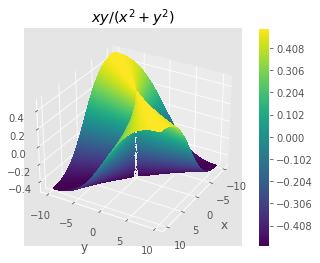

In [8]:
#%matplotlib notebook
xs       = np.linspace(-10., 10., 100)
ys       = np.linspace(-10., 10., 100)
xms, yms = np.meshgrid(xs, ys)
zms      = (xms * yms) /(xms*xms + yms*yms)
fig = plt.figure(); ax = plt.axes(projection='3d');
ax.view_init(azim=30.)
#sf  = ax.plot_surface(xms, yms, zms, cmap='jet', alpha = 1.);
#plt.xlabel('x'); plt.ylabel('y'); fig.colorbar(sf); plt.title('$xy/(x^2+y^2)$');
N = 500
CS3 = ax.contourf(xms, yms, zms, N, cmap="viridis")
ax.set_xlabel('x');ax.set_ylabel('y');ax.set_title('$xy/(x^2+y^2)$');
fig.colorbar(CS3, ax=ax)


Agora debuxamos os conxuntos de nivel. Son rectas? Que pasa se agora te achegas á orixe por cada unha desas liñas?


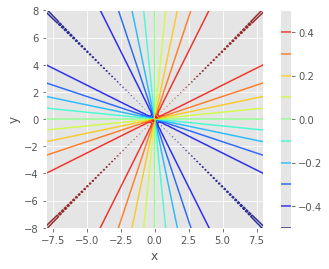

In [9]:
%matplotlib inline
fig = plt.figure(); ax = fig.gca()
cs  = [-0.4999, -0.4, -0.3, -0.2, -0.1, 0., 0.1, 0.2, 0.3, 0.4, 0.4999]
sf = ax.contour(xms, yms, zms, cs, cmap = 'jet', alpha = 0.8); ax.set_aspect('equal')
ax.set_xlim(-8., 8.); ax.set_ylim(-8., 8.); fig.colorbar(sf)
ax.set_xlabel('x'); ax.set_ylabel('y');


*Solución* :

 i) se estudamos o límite ao longo da recta $y = ax$ e tomamos o límite $x \to 0$

 $$
 \lim_{x \to 0} \frac{ax^2 }{x^2 + a^2 x^2} = \frac{a}{1+a^2}
 $$

 O límite depende da pendente $a$, polo que o límite non existe.

 Se $a = 0$, o límite sería 0.

 Se $a = \pm 1$, o límite sería $\pm 1/2$.



ii) Se cambiamos a polar e logo facemos o límite $r \to 0$.

 $$
 \lim_{r \to 0} \frac{r^2 \cos \phi \sin \phi}{r^2 (\cos^2 \phi + \sin^2 \phi)} = \cos \phi \sin \phi = \frac{1}{2} \sin 2 \phi
 $$

 O límite depende do ángulo $\phi$, polo tanto, o límite non existe.

 Se $\phi = 0, \pi/2$ a función é 0, mentres que para $\phi = \pm \pi/4$, é $\pm 1/2$.



**Exercicio** : Calcula se o límite existe na orixe da función:

 $$
 f(x, y) = \frac{x^2}{x- y^3}
 $$



*Solución* :

 se estudamos o límite ao longo da recta $y = ax$ e tomamos o límite $x \to 0$

 $$
 \lim_{x \to 0} \frac{x^2 }{x -  a^3 x^3} = \frac{x}{1-a^2 x^2} = 0
 $$
 
 poderíamos estar tentados a deixalo ir, e dicir que o límite existe...


problemos agora o límite ao longo da curva $y=x^{\frac{1}{3}}$

$$
 \lim_{x \to 0} \frac{x^2 }{x - (x^{\frac{1}{3}})^3} = \frac{x}{1-1} \to \infty
$$

Vexámolo graficamente


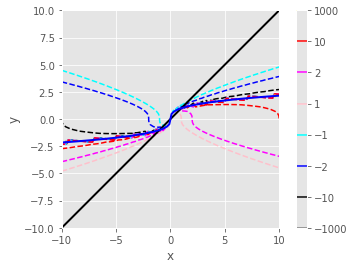

In [10]:
#%matplotlib notebook
xs       = np.linspace(-10, 10, 100)
ys       = np.linspace(-10, 10, 100)
xms, yms = np.meshgrid(xs, ys)
zms      = (xms **2 ) /(xms - yms**3)
a = 1. #pendente da recta que pasa pola orixe
xsl = np.linspace(-10, 10, 100)
ys = a*xsl
fig = plt.figure(); ax = fig.gca()
myl = [-1000,-10,-2,-1,1,2,10,1000]
sf = ax.contour(xms, yms, zms, myl, colors = ["grey","black","blue","cyan","pink","magenta","red","yellow"],linestyles="dashed"); ax.set_aspect('equal')
ax.plot(xsl, ys, color='black', lw=2)
fig.colorbar(sf)
ax.set_xlabel('x'); ax.set_ylabel('y');
ysn = np.cbrt(xsl) ## cubic root
ax.plot(xsl, ysn, color='blue', lw=2)
lims = ax.set_ylim( -10, 10)


**Exercicio** : Podes dar as ecuacións de todas as rectas que pasan por $(x_0, y_0)$? En cartesianas e polares.


*solución*:
    
En cartesianas:

$$
y = y_0 + a (x -x_0)
$$

En polares:

$$
x = x_0 + r \cos \phi, \;\;\; y = y_0 + r \sin \phi
$$


**Teorema**

 Sexan dúas funcións ${\bf f}:S \subset \mathbb{R}^n \to \mathbb{R}^m$ e ${\bf g}:S \subset \mathbb{R}^n \to \mathbb{R}^m$, e $\lambda$ un número real, se existen o $\lim_{{\bf x} \to {\bf a}} {\bf f}({\bf x}) = {\bf b}$ e o $\lim_{{\bf x}\to {\bf a}} {\bf g}({\bf x}) = {\bf c}$ cúmprese:

 $$
 i) \;\; \lim _{{\bf x} \to {\bf a}} {\bf f}({\bf x}) + {\bf g}({\bf x})= {\bf b} + { \bf c}
 $$

 $$
 ii) \;\; \lim _{{\bf x} \to {\bf a}} \lambda {\bf f}({\bf x}) = \lambda {\bf b}
 $$

 $$
 iii) \; \lim _{{\bf x} \to {\bf a}} {\bf f(x)} \cdot {\bf g}({\bf x}) = {\bf b \; c}
 $$

 $$
 iv) \;\; \lim _{{\bf x} \to {\bf a}} \| {\bf f}({\bf x}) \| = \| {\bf b} \|
 $$


**Teorema**

Sexa unha función vectorial ${\bf f}:S \subset \mathbb{R}^n \to \mathbb{R}^m$, e $f_i({\bf x})$ as m-funcións compoñentes de ${\bf f(x)}$. O límite 
$\lim_{{\bf x} \to {\bf a}} {\bf f(x)}= {\bf b}$, con ${\bf a} \in S$, existe, se e só se, existen os límites das súas m-funcións compoñentes e estes son $\lim_{{\bf x} \to {\bf a}} f_i({\bf x})= b_i$.


*Problema*

 Sexa a función vectorial:

$$    
{\bf f}( x, y) = \left( \frac{\sin \sqrt{x^2 + y^2}}{(x^2 + y^2)^{1/2}}, \frac{x y}{x^2 + y^2} \right)
$$

 Ten un límite na orixe?



### Continuidade

 Nas funcións unidimensionales, dixemos que a función era continua nun punto, $x_0$, se pertencía ao seu dominio, e o valor da función nese punto, $f(x_0)$, coincide co límite $\lim_{x \to x_0} f(x) = f(x_0)$

 Para unha función escalar, $f({\bf x})$, diremos que é continua en ${\bf x}_0$, se o punto está no dominio e o valor da función e o límite coinciden. :

 $$
 \lim _{{\bf x} \to {\bf x}_0} f({\bf x}) = f({\bf x}_0)
 $$

 E para unha función vectorial, ${\bf f}({\bf x})$, se, dado un ${\bf x}_0$ do dominio, ten:

 $$
 \lim _{{\bf x} \to {\bf x}_0} {\bf f} (x) = {\bf f}({\bf x}_0)
 $$



**Teorema**

 Sexan dúas funcións ${\bf f}:S \subset \mathbb{R}^n \to \mathbb{R^m}$ e ${\bf g}:S \subset \mathbb{R}^n \to \mathbb{R}^m$, e $\lambda$ un número real, se ${\bf f(x), \, g(x)}$ son continuos nun punto ${\bf a}$, cúmprese que as seguintes funcións tamén son continuas en ${\bf a}$:

 $$ i) \; {\bf f(x)} + {\bf g(x)} $$

 $$ ii) \; \lambda {\bf f(x)} $$

 $$ iii) \; {\bf f(x)} \cdot {\bf g(x)} $$

 $$iv) \; \| {\bf f(x)} \| $$




 **Teorema**

 Se a función vectorial é continua en ${\bf a}$, tamén o son as funcións de compoñentes $m$ ${\bf f(x)} = (f_1({\bf x}),\dots,f_m ({ \bf x}))$ e viceversa.


**Isto é todo por agora!**


### Apéndice

**Teorema**

Sexa ${\bf g}: A \subset \mathbb{R}^n \to \mathbb{R}^m$ e ${\bf f}:B \subset \mathbb{R}^m \to \mathbb{R}^p$, onde supoñemos que o rango de ${\bf g}$ está no dominio de ${\bf f}$, B. Se ${\bf g(x)}$ é continua en ${\bf a}$ e ${\bf f(y)}$ o é en ${\bf g(a)}$, entón a función composta ${\bf  f \circ g}: A \subset \mathbb{R}^n \to \mathbb{R}^p$ é continua en ${\bf a}$.


*Demostracion:* 

Ao ser ${\bf g}, \, {\bf f}$ continuas en ${\bf a}$ e ${\bf g(a)}$, temos que $\forall \, \epsilon >0$ e $\epsilon' >0$ existen $\delta >0$ e $\delta'>0$ e cúmprese

$$
\| {\bf x} - {\bf a} \| < \delta \Rightarrow \| {\bf g(x)}-{\bf g(a)} \| < \epsilon' 
$$

$$
\| {\bf y} - {\bf b} \| < \delta' \Rightarrow \| {\bf f(y)}-{\bf f(b)} \| < \epsilon 
$$
 
Ao compor ${\bf g}$ sobre ${\bf f}$, aplicamos a función ${\bf f}$ sobre os puntos de chegada de ${\bf g}$. Isto é  ${\bf y} = {\bf g(x)}$ e ao ser ademais ${\bf g}$ continua, $ {\bf b} = {\bf g(a)}$.   

Se tomamos $\epsilon' = \delta '$, temos que para todo $\epsilon>0$, existe un $\delta$, tal que, se $\| {\bf x}-{\bf a} \| < \delta$, entón,

$$
\| {\bf f(g(x))} - {\bf f(g(a))} \| = \, \| {\bf (f \circ g)(x)} - {\bf (f \circ g)(a)} \| < \epsilon.
$$ 

que é a condición de que exista o límite e que a función composta sexa continua.

Q.E.D.


*Pregunta* : Esta función $h(x,y) = \sin^2 (x^2+y^2)$ é continua?
